## Resampling Techniques, model selection, Assessment and evaluating hypotheses
- Uses Notes from python for ML by Sebastian Rachka, Introduction to Statistical Learning and my own thoughts

## Pipelines

- In all ML models, we have to use paramters obtained via training to estimate value over test set.   
- In Scikit-learn, Pipeline class allows us to fit an model using arbitrary number of transformation steps and apply it to new data.  

# Wisconsin Breast Cancer Dataset
- Contains 569 samples of malignant and benign tumor cells.  
- column 1 and 2 store unique id numbers of the samples and the corresponding diagnosis
- columns 3-32 contains 30 real valued features that have been compuuted from digitized images of the cell nuclei, 
which can be used to predict whether a tumor is malignant or benigh.  

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [2]:
pd.DataFrame(data.data, columns=data.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
pd.Series(data.target).map(lambda x: data.target_names[x])

0      malignant
1      malignant
2      malignant
3      malignant
4      malignant
         ...    
564    malignant
565    malignant
566    malignant
567    malignant
568       benign
Length: 569, dtype: object

In [4]:
# Next use labelEncoder to encode the class labels
X = data.data
y = data.target

In [5]:
# we don't really need to use LabelEncoder as its already encoded
from sklearn.preprocessing import LabelEncoder
y = pd.Series(data.target).map(lambda x: data.target_names[x])
le = LabelEncoder()
y = le.fit_transform(y)


In [6]:
le.transform(['benign', 'malignant'])

array([0, 1])

In [7]:
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

## Combining transformers and estimators in a pipeline
- many ML models require input features on same scale for optimal performance.  (Why?)
- suppose we standardize the columns before feeding them to linear classifier.  
- Also we want to do feature extraction by performing a pca on the dataset prior to feeding it to logistic regression model  

In [8]:
from random import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1))
pipe_lr.fit(X_dev, y_dev)
y_pred = pipe_lr.predict(X_test)


In [9]:
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1])

In [10]:
print(f"test accuracy: {pipe_lr.score(X_test, y_test)}")

test accuracy: 0.956140350877193


# Analysis
- When you use make_pipeline, it takes arbitrary number of transformers (objects with fit and transorm methods) and as last parameter, it takes an estimator
- In preceding example, we provided two transformers, StandardScaler() and PCA() and LogisticRegression is the estimator
- When you call fit method of pipeline, data is passed through a series of transformations until it finally arrives to the estimator.  The estimator is then fitted on this transformed data
- In above example, LogisticRegression is fitted on training examples that has gone through a series of transformations via standard scaler and pca.  
- When data is passed to predict method of pipeline, that data goes through a series of transformation such as standard scalar and pca.  in final step, estimator will return prediction on transformed data, $D_{Dev}$ or $D_{Test}$

## Resampling
- Repeatedly draw samples from training set and fit a model on each sample in order to obtain better information about the fitted model
- Why is this important?  Suppose we fit a linear regression model on full data and wanted to assess variability of the fits.  
- One way to assess the variability of the fits is to repeatedly draw samples from the data fit a linear regression on each sample and assess the variability of the fits
- Hence we can get far more information than would not be possible had we fit the model only once using original training sample

## Two most commonly used resampling methods
- Cross-Validation
    - estimates test error rate associated with a given statistical learning method to evaluate its performance
    - Model Assessment: process of evaluating model's performance on $D_{Val}$
    - Model Selection: process of selecting proper level of flexibility also based on $D_{Val}$
- Bootstrap
    - Provides measure of accuracy of a parameter's estimate of a given statistical model

## Cross-Validation
- basic idea is we need to estimate performance of a model on data not seen before.  
- Best way to approximate performance of a model on data it has not seen before (called model's generelization performance) is to fit on $D_{Dev}$ and evaluate it on $D_{Val}$
- Then choose the best performing model (what is best?  model with lowest error rate or highest $R^2$ in case of linear regression)

## Holdout Method
- randomly divide Data $D$ into 3 parts, $D_{Dev}$, $D_{Val}$ and $D_{Test}$
- Fit hypothesis $h_1(\theta)$, $h_2(\theta)$, $h_3(\theta)$, $...$, $h_m(\theta)$ on $D_{Dev}$
- Evaluate all the m hypotheses on the validation data set $D_{Val}$ and choose the one with the lowest error rate (Hence, validation data is used for model selection)
- Finally, use the $h_{Optim}(\theta)$ to predict values on test set and error rate on $D_{Test}$.  This error serves as an estimate of generalizaton error for future unseen data

## Disadvantage of Holdout Method
- sensitive to how we actually split the data.  If class labels are imbalanced, it won't provide a good estimate of model's generalization error.  


## Leave-One-Out-Cross-Validation (LOOCV) Algorithm 
#### __(Recommended to use when number of examples is small)__
- Formulate an ansatz on the possible m hypotheses.  Pick the first hypothesis $h_1(\theta)$ and split the training set into two parts, $D_{dev}$ and $D_{Val}$
- assign $(x^1, y^1)$ for validation set
- fit a hypothesis $h^1_\theta (x)$ on $D_{dev} \setminus (x^1, y^1)$
- predict the first observation $h^1_\theta (x^1)$ = $\hat{y^1}$ using the excluded observation in validation set
- Compute $Error_1 = Loss(y^1, h_{\theta}(x^1))$  This is the unbiased estimate of test error
- But even if the error is unbiased, its highly variable since its using only a single observation.  Hence a poor estimate
- Repeat the above steps, but this time, take out $(x^2, y^2)$ and place it in $D_{Val}$ and fit a hypothesis $h^2_{\theta} (x)$ on $D_{dev} \setminus (x^2, y^2)$
- Then make prediction $h^2_\theta (x^2)$ = $\hat{y^2}$ and estimate $Error_2 = Loss(y^2, h_{\theta}(x^2))$ 
- Hence we get $Error_1, Error_2, ..., Error_n$
- The estimate of the true test Error is then average of all these errors: 
  
  $LOOCV_1(n) = \frac{1}{n} \sum \limits _{i=1} ^{n}{Error_i}$

  #### Model Selection
  - Once LOOCV(n) estimate is computed for a particular hypothesis $h_1(\theta)$
  - Repeat the above steps for $h_2(\theta)$, $h_3(\theta)$, $h_4(\theta)$, $...$, $h_m(\theta)$ 
  - Choose the hypothesis with the lowest $LOOCV(n)$ estimate and call this $h_{Optim}(\theta)$ 
  - ReFit the hypothesis $h_{Optim}(\theta)$ on $D_{Dev}$ that contains all the samples to estimate the generalization error on the test set
  - In regresion or polynomial regression, there is a shortcut to make LOOCV cost the same as a single fit, 

    $LOOCV(n) \approx \frac{1}{n} \sum (\frac{y^i - \hat{y^i}}{1-h^i})^2$

    where $h^i$ is leverage of ith error (leverage is amount an observation influences its own fit) and lies between 1/n and 1

  #### Advantages of LOOCV
  - less bias than HoldOut Method since we repeatedly fit a hypothesis using data that contains n-1 observations which is almost the entire data
  - In holdout, we use half the data in development and validation sets.  This is randomized.  Hence we get different results based on how data is split
  - In LOOCV, no matter how we split the data, the final hypothesis is consistent with training examples and has the least generalizaton error.  
  - Does not overestimate test error rate like hold-out method does

  #### Disadvantages of LOOCV
  - Computationally intensive.  If we hae m hypotheses, each of which is fit n times.  Hence $T(n) \sim O(mn) $

  ## K-Fold Cross Validation
- Formulate an ansatz on the possible m hypotheses.  Pick the first hypothesis $h_1(\theta)$
- Randomly split the Data $D$ into two halves, $D_{Dev}$ and $D_{Test}$
- Further Split $D_{Dev}$ into k folds, $D_{Dev} = D_1 \cup D_2 \cup ... \cup D_k$
- while k > 0:
    -  Choose $D_k$ as held out set
    -  Fit the hypothesis $h^k(\theta)$ on $D_{Dev}\setminus D_k$
    -  Compute error on held out set, $Error_k = \frac{1}{|D_k|} \sum_{x,y \in D_k} Loss(y, h_{\theta}(x))$
    -  Set $k \leftarrow k - 1$
- Hence we have $Error_1, Error_2, ..., Error_k$
- Then we compute the k-fold Cross Validation estimate of test error: 

  $CV_k = \frac{1}{k} \sum_{i=1}^k Error_i$

- Once $CV_k$ estimate is computed for a particular hypothesis $h_1(\theta)$
- Repeat the above steps for $h_2(\theta)$, $h_3(\theta)$, $h_4(\theta)$, $...$, $h_m(\theta)$ 
- Choose the hypothesis with the lowest $CV_k$ estimate and call this $h_{Optim}(\theta)$ 
- ReFit the hypothesis $h_{Optim}(\theta)$ on $D_{Dev}$ that contains all the samples to estimate the generalization error on the test set

## Observation
- When $k=n$, this is same as leave one out cross validation.  
- In practice, use $k=10$ or $k=5$.  Don't use $k=n$ as its computationally intensive unless its linear or quadratic regression, in which case use the short-cut method posted above.  
- Larger k, more accurate the estimator.  
- Both LOOCV and K-fold underestimate true test error rates although they get the U shape property of test errors correct and hence also get correct degree of polynomial (if we are plotting error vs flexibility)

## Advantage of k-fold CV 
#### __(Recommended to use when number of examples is large)__
- When k < n, has computational advantage to LOOCV
- gives more accurate estimates of test Error than LOOCV due to bias-variance tradeoff
  - hold out approach leads to over estimation of test error since the hypothesis only learns from 1/2 of the Dataset
  - LOOCV will give unbiased estimate of test error since each development set contains n-1 training instances
  - k-fold will give intermediate bias since training set contains $D_{Dev} \setminus D_k$ samples which is much fewer than LOOCV, but higher than hold-out approach
  - if bias reduction is the goal, use LOOCV.  
  - LOOCV test error estimates have higher variance than k-fold (Why?)
  - This is because when performing LOOCV, for a particular hypothesis, we have to fit this model n times.  Hence, there are n fitted models, each of which are trained using identical dataset.  Hence correlation among fitted hypothesis is high, hence we have large covariance matrix, therefore variance is high.  
  - But when performing k-fold, we are averaging errors from k-fitted models for a partciular hypothesis, where the hypothesis is trained on datasets that are less in common.  

## Stratified k-fold
- yields better bias and variance estimates of test errors especially in cases of unequal class distribution.  
- class proportion is preserved in each fold to ensure that each fold is representative of the class proportions in the training set


In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
kfold = StratifiedKFold(n_splits=10).split(X_dev, y_dev)



In [12]:
class Folds:
    def __init__(self, dev_index, val_index):
        self.dev_index = dev_index
        self.val_index = val_index 



In [13]:
folds = []
for dev, val in kfold:
   folds.append(Folds(dev_index = dev, val_index = val))


In [14]:
len(folds)

10

In [15]:
scores = []
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1))
for fold in folds:
    pipe_lr.fit(X_dev[fold.dev_index], y_dev[fold.dev_index])
    score = pipe_lr.score(X_dev[fold.val_index], y_dev[fold.val_index])
    print(f"score: {(score):.3f}")
    scores.append(score)

score: 0.935
score: 0.935
score: 0.957
score: 0.957
score: 0.935
score: 0.956
score: 0.978
score: 0.933
score: 0.956
score: 0.956


In [16]:
import numpy as np
np.average(scores), np.std(scores)

(0.9495169082125603, 0.013854294239660376)

Hence, for the above logistic regression, average accuracy score is 95%
- Sklearn has a short cut way of estimating score of each learning algorithm
- n_jobs parameter allows us to distribute work across cpus, here 1 is chosen.  if you choose 2, 5 folds are evaluted in 1 cpu and other 5 in the other cpu
- setting n_jobs=-1 uses all available cpus in ur computer

In [17]:
from sklearn.model_selection import cross_val_score

scores_check = cross_val_score(estimator=pipe_lr,
X=X_dev,
y=y_dev,
cv=10,
n_jobs=2)

In [18]:
np.array_equal(np.array(scores), scores_check)

True

## Debugging Algorithms with Learning and Validation Curves
- learning curves and validation curves help us improve performance of a machine learning model.  
- learning curves helps determine if model has high variance (over-fitting) or underfitting (high bias)
- Recall that whatever hypothesis we select (regression problems), the expected test error can be decomposed into three terms:

$E((y^o - \hat{h}_\theta(x^o))^2) = \sigma_\epsilon^2 + Var(\hat{h}(x^o)) + Bias(\hat{h}(x^o))^2$

where $(x^o, y^o) \in D_{Test}$

- As flexibility increases, variances increases, but bias will decrease.  Rate at which these two properties compete affects the test Error

### Learning Curve
- plot of model performance P over experience E or time T
- Performance during development and validation datasets can be used to diagnose underfit, overfit or well-fit model
- helps diagnose whether development set and validation datasets are not relatively reprentative of the problem domain


Sometimes, it helps to collect more examples to reduce degree of overfitting.  But this is usually more exepensive or not feasible
- Learning curves can help determine if collection of more data is needed or not.  

Rules
- if accuracy during development and during validtion is less than desired accuracy, then underfitting has occured (high bias).  Increase the number of parameters in the model by constructing additional fetures, or decreasing degree of regularization (for SVM and Logistic Classifiers)
- if accuracy during development is greater than desired accuracy, but accuracy in validation set is less than desired, then overfitting has occured (high variance).  To address this, we either collect more training data, reduce complexity of the model by removing features or increase regularizatin parameter or using feature selection or extraction for unregularized models.  Collecting more data tends to decrease change of overfitting, but it may not help if development data is noisy or model is close to being optimal.  
- Good bias variance trade off is when the two curves converge.  

In [30]:
from sklearn.model_selection import learning_curve, validation_curve
import numpy as np
import matplotlib.pyplot as plt 

def plot_learning_curve(
    estimator=None, X=None, y=None, cv=5, train_sizes=None, scoring=None
):
    dev_sizes, dev_scores, val_scores = learning_curve(
        estimator=estimator,
        X=X,
        y=y,
        train_sizes=train_sizes,
        cv=cv,
        n_jobs=1,
        scoring=scoring,
    )

    train_mean = np.mean(dev_scores, axis=1)
    train_std = np.std(dev_scores, axis=1)
    test_mean = np.mean(val_scores, axis=1)
    test_std = np.std(val_scores, axis=1)

    plt.grid()
    plt.plot(
        dev_sizes,
        train_mean,
        color="red",
        marker="o",
        markersize=5,
        label="Development Set Accuracy",
    )

    plt.fill_between(
        dev_sizes,
        train_mean + train_std,
        train_mean - train_std,
        alpha=0.15,
        color="red",
    )

    plt.plot(
        dev_sizes,
        test_mean,
        color="green",
        linestyle="--",
        marker="s",
        markersize=5,
        label="Validation Set Accuracy",
    )

    plt.fill_between(
        dev_sizes,
        test_mean + test_std,
        test_mean - test_std,
        alpha=0.15,
        color="green",
    )
    plt.xlabel("Number of training samples")
    plt.ylabel("Accuracy")
    plt.ylim([0.8, 1.02])
    plt.legend(loc="lower right")

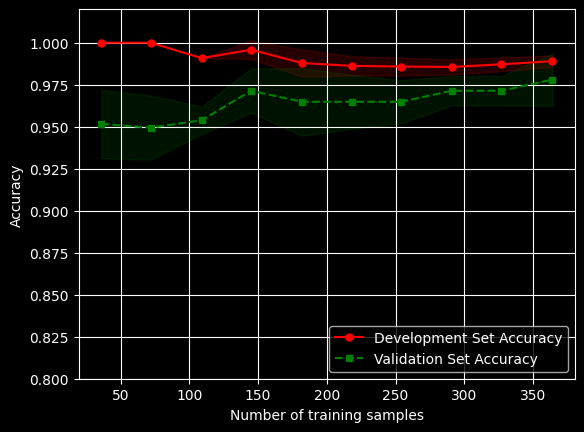

In [35]:
estimator = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', max_iter=200))
plot_learning_curve(estimator=estimator, X=X_dev, y=y_dev, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy');

- Sklearn's plot learning curve uses stratified cross-validation to compute the scores in learning curves.  
- Hence we just get the scores from dev and validation sets using this function and plot them as function of number of training examples
- Notice that as number of samples decrease from 250 and less, development set accuracy is higher than validation set accuracy indicating overfitting.  As we increase sample size, about 250, theres less overfitting

## Validation Curves - Helps address over and underfitting
- addresses issues related to overfitting and underfitting.  
- instead of plotting dev accuracy and validation accuracy as functions of sample size, we vary vavlues of the model parameters



In [36]:
def plot_validation_curve(
    estimator=None,
    X=None,
    y=None,
    param_range=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    param_name=None,
    cv=5,
    scoring=None,
):

    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
        scoring=None,
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(
        param_range,
        train_mean,
        color="blue",
        marker="o",
        markersize=5,
        label="training accuracy",
    )

    plt.fill_between(
        param_range,
        train_mean + train_std,
        train_mean - train_std,
        alpha=0.15,
        color="blue",
    )

    plt.plot(
        param_range,
        test_mean,
        color="green",
        linestyle="--",
        marker="s",
        markersize=5,
        label="validation accuracy",
    )

    plt.fill_between(
        param_range,
        test_mean + test_std,
        test_mean - test_std,
        alpha=0.15,
        color="green",
    )

    plt.grid()
    plt.xscale("log")
    plt.legend(loc="lower right")
    plt.ylim([0.8, 1.03])
    plt.xlabel("Parameter: {}".format(param_name))
    plt.ylabel("Accuracy")

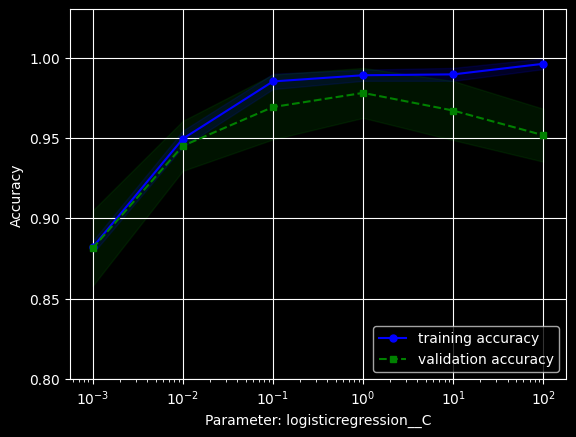

In [37]:
plot_validation_curve(estimator=estimator, X=X_dev, y=y_dev, param_name='logisticregression__C', scoring='accuracy');

- validation_curve uses stratified k-fold by default to estimate performance of classifier
- we chose $ C = \frac{1}{\lambda}$ parameter to evaluate, which is the inverse regularization parameter of LogisticRegression
- Model overfits the data as we increase regularization parameter as regularization becomes weaker.  Sweet spot is where C is between 0.01 and 0.1

## Fine-tuning ML Models via grid search
- In ML models, there are two parameters.  
    - Those that are to be estimated as part of the learning process from data
    - Those that are part of the model itself (like regularization parameter C or depth of decision tree).  This is called tuning or hyperparameter
- Validation curve helps improve performance of a ML model by tuning one of the model's hyperparameter
- Grid Search is hyperparameter optimization technique that can help improve performance of a ML model by finding optimal combination of hyperparameter values
- Grid Search is a brute force exhaustive search where we specify a list of values for different hyperparameters and computer evalutes model's performance for each combination of those 
to obtain optimal combination of values from this set


In [39]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
'svc__kernel': ['linear']},
{'svc__C': param_range,
'svc__gamma': param_range,
'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gs.fit(X_dev, y_dev);

In [40]:
gs.best_score_

0.9846859903381642

In [41]:
gs.best_params_

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

In [42]:
clf = gs.best_estimator_


In [44]:
clf.fit(X_dev, y_dev);
clf.score(X_test, y_test)

0.9736842105263158

- Although gridsearch is very powerful tool for finding optimal parameter combinations, its computationally very expensive.  
- Alternative approach is to use randomized search

## Algorithm Selection via nested cross-validation
- Using kfold cv with gridsearch is powreful tool for fine-tuning ML models by varying its hyperparameter values
- if one wants to select among different ML algorithms, another recommended approach is nested cross-validation
- nested cv is also called 5x2 cv and in sklearn we use nested cv by using cv=2.  

In [45]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1)

In [49]:
scores = cross_val_score(gs, X_dev, y_dev, scoring='accuracy', cv=5)

In [50]:
np.mean(scores)

0.9736263736263737

In [52]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
gs = GridSearchCV(estimator=clf_dt, param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}], scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_dev, y_dev, scoring='accuracy', cv=5)
np.mean(scores)

0.9340659340659341

- Hence we see, nested cross validation performance of SVM model (97.4% accuracy) is better than performance of decision tree (93.4%)
- So we expect that it might be better choice to classify new data with SVM rather than DT, based on distribution of this data $D$

## Plotting ROC Curves
- helpful tool to select models for classification based on their performance with respect to FPR and TPR
- Diagonal of ROC is called random guessing
- Classification models that fall below diagonal are worse than random guessing
- perfect classifier will fall in top left corner of graph with TPR=1 and FPR=0
- Based on ROC, we can compute the ROC Area Under the Curve (ROC AUC) to characterize performance of classification models
- __precision-recall curves__ plot different probability thresholds of a classifier
- Assume $D$ is the Wisconson Breast Cancer dataset and lets use logistic regression pipeline.  We will make classification task more challenging for the classifier so that resulting ROC curve becomes visually more interesting
- For the same reason, we will reduce CV to 3 folds (to help visualize better)

## Dealing with Class Imbalance

## BootStrapping

In [ ]:
## 